In [33]:
import pandas as pd
import matplotlib.pyplot as plt



In [34]:
rf_df = pd.read_csv('./data/sub_RF.csv')
lstm_df = pd.read_csv('./data/sub_LSTM_001.csv')

In [35]:
rf_df

,num_date_time,answer
0,1_20240825 00,4780.344135
1,1_20240825 01,4403.610031
2,1_20240825 02,4018.716916
3,1_20240825 03,3990.185631
4,1_20240825 04,3993.619605
...,...,...
16795,100_20240831 19,1739.383653
16796,100_20240831 20,2036.015778
16797,100_20240831 21,1929.621013
16798,100_20240831 22,2199.088814


In [36]:
lstm_df

,num_date_time,answer
0,1_20240825 00,4125.810504
1,1_20240825 01,3889.949033
2,1_20240825 02,3762.130355
3,1_20240825 03,3815.345463
4,1_20240825 04,3884.198290
...,...,...
16795,100_20240831 19,1918.853103
16796,100_20240831 20,1860.416086
16797,100_20240831 21,1765.393707
16798,100_20240831 22,1682.809702


In [37]:
lstm_df = lstm_df.rename(columns={"answer": "lstm"})
rf_df   = rf_df.rename(columns={"answer": "rf"})

In [38]:
ens_df = lstm_df[["num_date_time"]].copy()
ens_df["lstm"] = lstm_df["lstm"].values
ens_df["rf"]   = rf_df["rf"].values

In [39]:
ens_df = lstm_df[["num_date_time"]].copy()
ens_df["lstm"] = lstm_df["lstm"].values
ens_df["rf"]   = rf_df["rf"].values

In [40]:
ens_df["final_0"] = ens_df["rf"]

In [41]:
ens_df["final_1"] = ens_df["lstm"]


In [42]:
alpha_1 = 0.25
ens_df["final_2"] = ens_df["lstm"] + alpha_1 * (ens_df["rf"] - ens_df["lstm"])


In [43]:
alpha_2 = 0.35
ens_df["final_3"] = ens_df["lstm"] + alpha_2 * (ens_df["rf"] - ens_df["lstm"])


In [44]:
alpha_3 = 0.5
ens_df["final_4"] = ens_df["lstm"] + alpha_2 * (ens_df["rf"] - ens_df["lstm"])

In [45]:
alpha_4 = 0.65
ens_df["final_4"] = ens_df["lstm"] + alpha_2 * (ens_df["rf"] - ens_df["lstm"])

In [46]:
alpha_5 = 0.75
ens_df["final_5"] = ens_df["lstm"] + alpha_2 * (ens_df["rf"] - ens_df["lstm"])

In [47]:
for c in ["final_0", "final_1", "final_2", "final_3", "final_4", "final_5"]:
    ens_df[c] = ens_df[c].clip(lower=0)


In [48]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_ensemble_selected_buildings(ens_df, building_ids):
    for b_id in building_ids:
        df_plot = ens_df[
            ens_df["num_date_time"].str.startswith(f"{b_id}_")
        ].copy()

        if df_plot.empty:
            print(f"건물 {b_id} 데이터 없음")
            continue

        df_plot["datetime"] = pd.to_datetime(
            df_plot["num_date_time"].str.split("_").str[1]
        )

        plt.figure(figsize=(15, 5))
        plt.plot(df_plot["datetime"], df_plot["final_0"], label="RF", alpha=0.8)
        plt.plot(df_plot["datetime"], df_plot["final_1"], label="LSTM", alpha=0.8)
        plt.plot(df_plot["datetime"], df_plot["final_2"], label="LSTM + 0.25*(RF-LSTM)", alpha=0.8)
        plt.plot(df_plot["datetime"], df_plot["final_3"], label="LSTM + 0.35*(RF-LSTM)", alpha=0.8)
        plt.plot(df_plot["datetime"], df_plot["final_4"], label="LSTM + 0.65*(RF-LSTM)", alpha=0.8)
        plt.plot(df_plot["datetime"], df_plot["final_5"], label="LSTM + 0.75*(RF-LSTM)", alpha=0.8)

        plt.title(f"Building {b_id} – Ensemble Comparison")
        plt.xlabel("Datetime")
        plt.ylabel("Power Consumption")
        plt.legend()
        plt.tight_layout()
        plt.show()


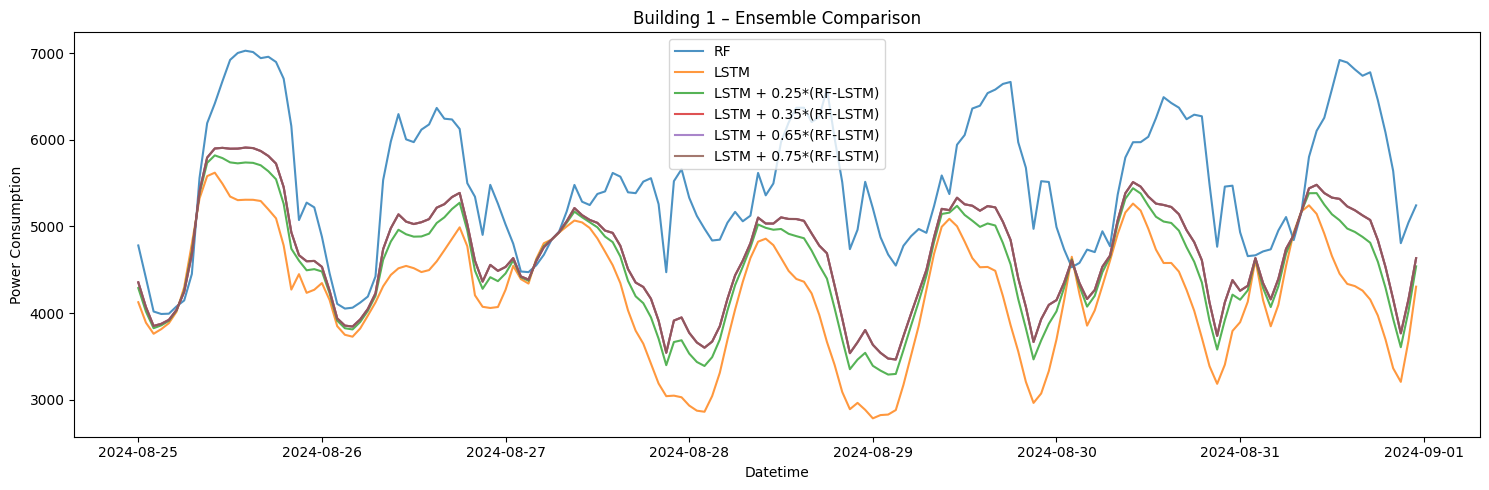

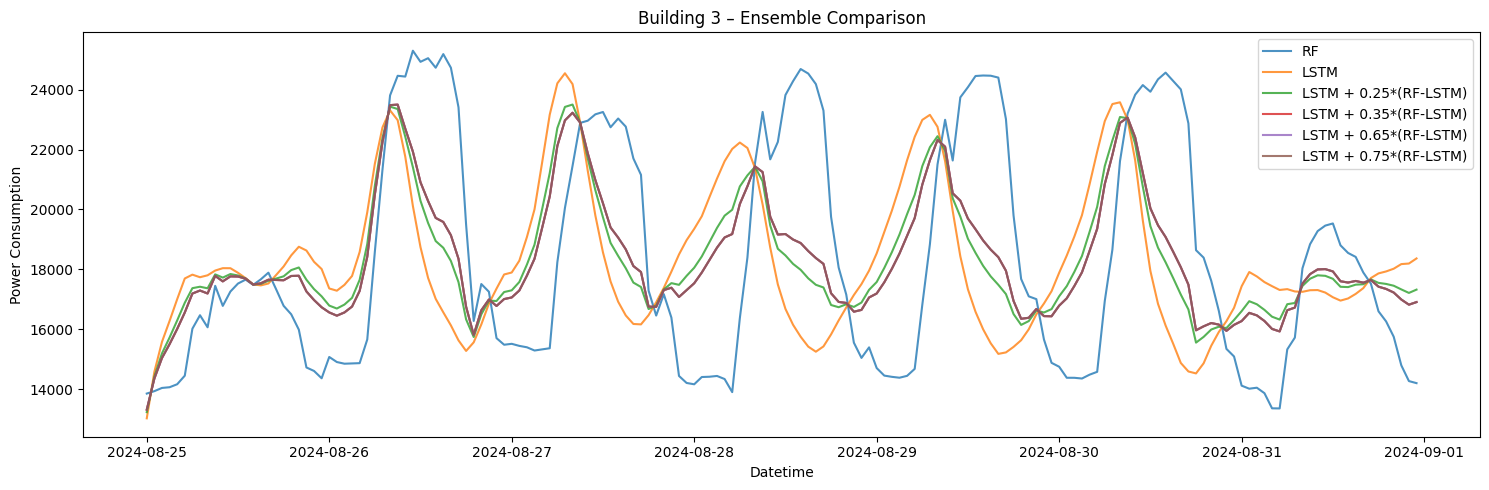

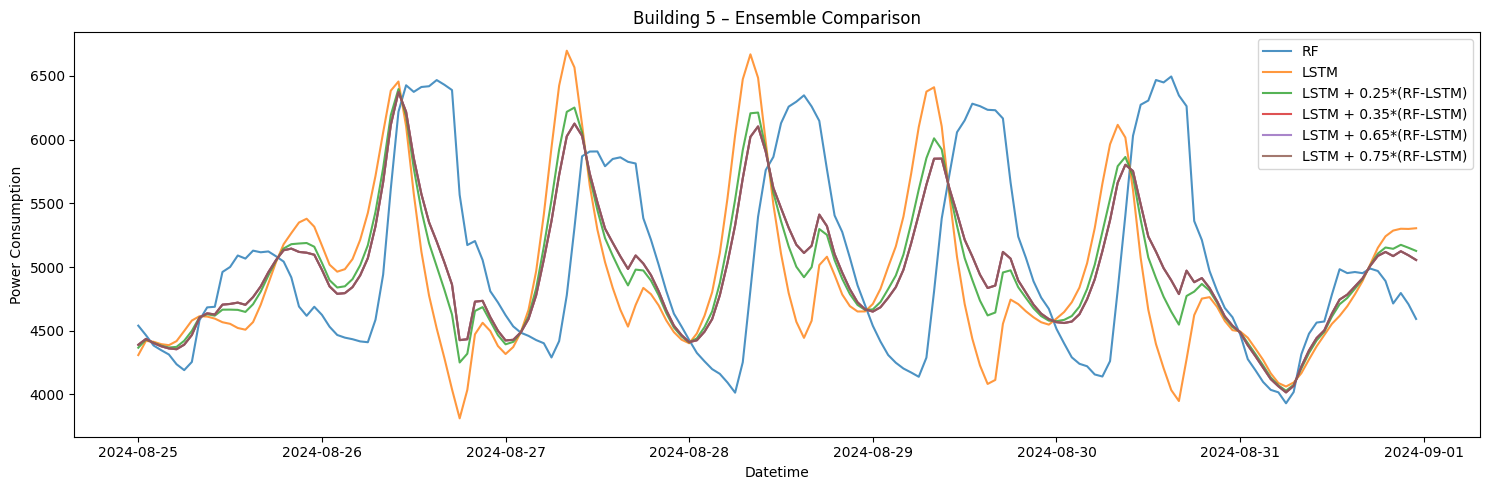

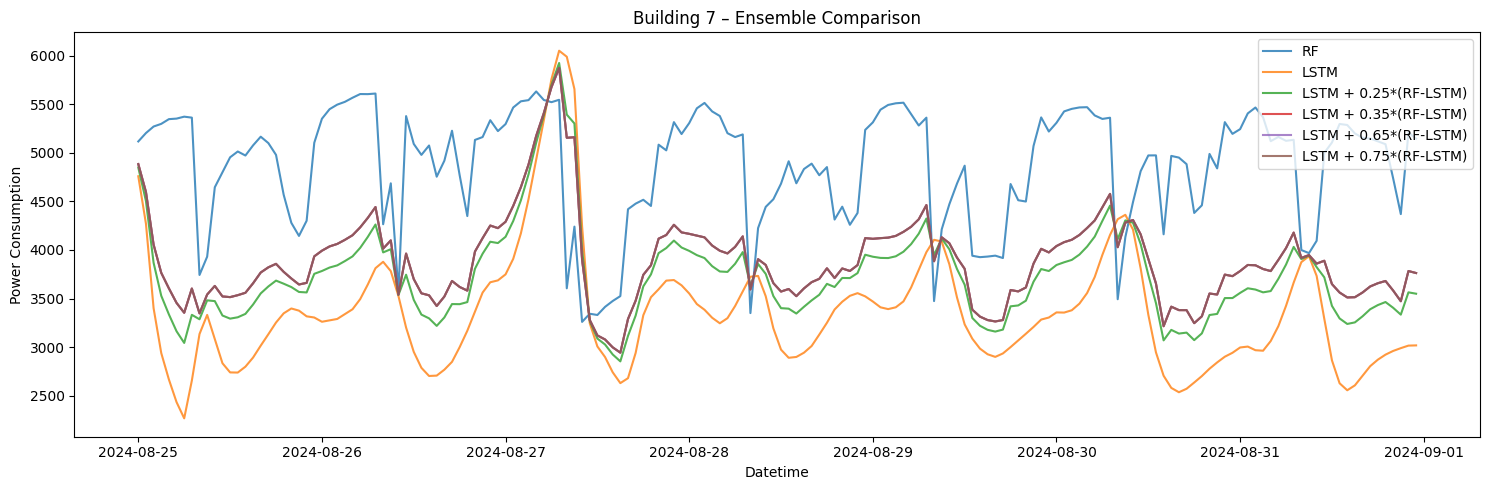

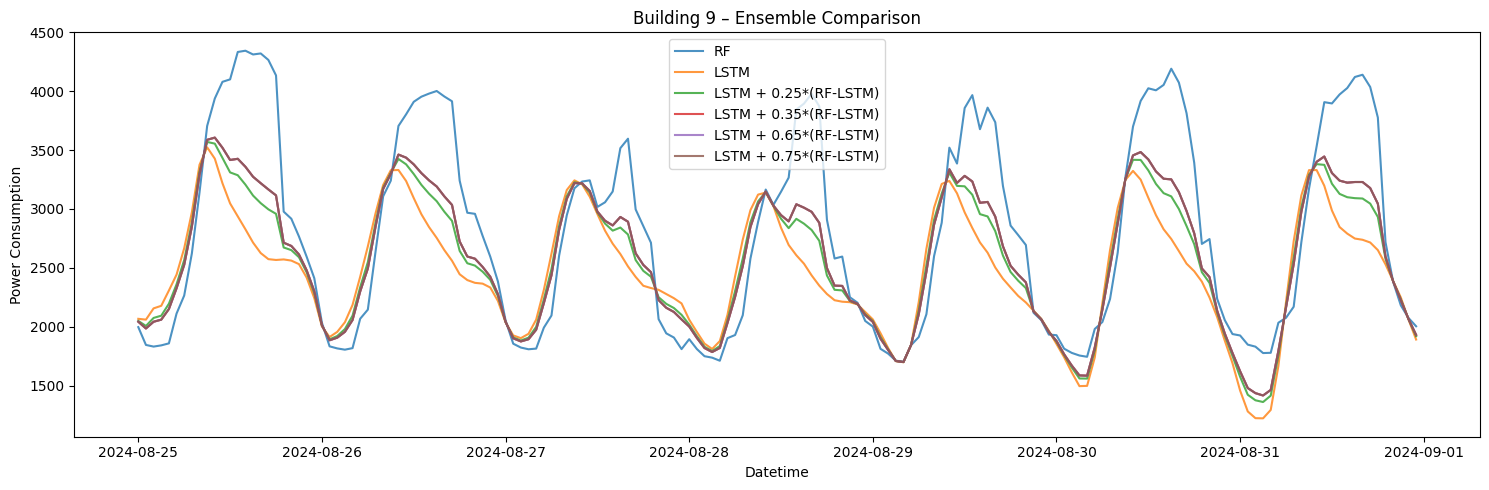

In [49]:
plot_ensemble_selected_buildings(
    ens_df,
    building_ids=[1, 3, 5, 7, 9]
)


In [52]:

#submit_1 = ens_df[["num_date_time", "final_1"]].rename(columns={"final_1": "answer"})
submit_2 = ens_df[["num_date_time", "final_2"]].rename(columns={"final_2": "answer"})
submit_3 = ens_df[["num_date_time", "final_3"]].rename(columns={"final_3": "answer"})

submit_4 = ens_df[["num_date_time", "final_4"]].rename(columns={"final_4": "answer"})
submit_5 = ens_df[["num_date_time", "final_5"]].rename(columns={"final_5": "answer"})


In [53]:

#submit_1.to_csv("submit_lstm.csv", index=False)
submit_2.to_csv("submit_lstm_rf_025.csv", index=False)
submit_3.to_csv("submit_lstm_rf_035.csv", index=False)
submit_4.to_csv("submit_lstm_rf_065.csv", index=False)
submit_5.to_csv("submit_lstm_rf_075.csv", index=False)

